## Task-2 - 

Assuming the success factor to be the IMDB rating of a movie, building a model to predict
these ratings given a subset of variables from (Task-1) the data collection exercise.

Estimating the effect of each of the variables on the output variable. Selecting a subset of these variables for building our model, we are trying to see if IMDB ratings can be predicted to certain degree to help create winning combinations for movie makers.

### Model Building

The dataset is divided into 80% train and 20% test and try out multiple methods to arrive at the best output. Both MAPE
(Mean absolute percentage error) and RMSE evaluation metrics are used on the test dataset to report the performance.

#### CONTENTS

[1. Overview of data](#1.0-Overview-of-the-data)

[2. Data Re-Structuring](#2.0-Data-Re-structuring)

[3. Part 3 - Data Exploration and cleaning](#3.0-Data-Exploration-and-cleaning)

[4. Concatenate dataframes and export CSV](#4.0-Cocatenate-dataframes-and-export-to-CSV)

[End Notes](#End-Notes)

In [1]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
import requests

# Vizulization
import matplotlib
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

# Plot settings
plt.style.use('seaborn') # URL for style sheets (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# warning settings
import warnings
warnings.filterwarnings("ignore")

#### 1.0 Overview of the data

 - Checking data structure, 
 - Rename columns for ease of coding
 - Obtaining missing and unique values from each column
 - Obtaining categorical and numerical variables

In [2]:
# Importing csv files 
dataset = pd.read_csv('data/imdb_web_scraping.csv')

In [3]:
dataset.head()

,Name of the movie,Link,Year released,IMDB rating,Reviewers,Movie_rating,Movie_duration,Genre1,Genre2,Genre3,...,Stars4,Stars5,PlotKeywords,Budget_curr,Budget_val,Gross_USA_curr,Gross_USA_val,Cum_Gross_Worldwide_curr,Cum_Gross_Worldwide_val,Production_Company
0,The Shawshank Redemption,/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...,1994.0,9.2,2045328.0,A,2h 22min,Drama,,,...,,,wrongful imprisonment| escape from prison| bas...,USD,25000000.0,USD,28341469.0,USD,5.850000e+07,Castle Rock Entertainment
1,The Godfather,/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...,1972.0,9.2,1402791.0,A,2h 55min,Crime,Drama,,...,,,mafia| crime family| patriarch| organized crim...,USD,6000000.0,USD,134966411.0,USD,2.450664e+08,"Paramount Pictures, Alfran Productions"
2,The Godfather: Part II,/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...,1974.0,9.0,972533.0,NaN,3h 22min,Crime,Drama,,...,,,revenge| corrupt politician| bloody body of ch...,USD,13000000.0,USD,57300000.0,NaN,0.000000e+00,"Paramount Pictures, The Coppola Company"
3,The Dark Knight,/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...,2008.0,9.0,2012714.0,UA,2h 32min,Action,Crime,Drama,...,,,dc comics| moral dilemma| psychopath| clown| s...,USD,185000000.0,USD,534858444.0,USD,1.004558e+09,"Warner Bros., Legendary Entertainment, Syncopy"
4,12 Angry Men,/title/tt0050083/?pf_rd_m=A2FGELUUNOQJNL&pf_rd...,1957.0,8.9,576027.0,NaN,1h 36min,Drama,,,...,,,jury| dialogue driven| courtroom| single set p...,USD,350000.0,USD,4360000.0,NaN,0.000000e+00,Orion-Nova Productions


In [4]:
dataset.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Reviewers', 'Movie_rating', 'Movie_duration', 'Genre1', 'Genre2',
       'Genre3', 'Genre4', 'Release_date', 'Summary', 'Director', 'Writer1',
       'Writer2', 'Writer3', 'Stars1', 'Stars2', 'Stars3', 'Stars4', 'Stars5',
       'PlotKeywords', 'Budget_curr', 'Budget_val', 'Gross_USA_curr',
       'Gross_USA_val', 'Cum_Gross_Worldwide_curr', 'Cum_Gross_Worldwide_val',
       'Production_Company'],
      dtype='object')

In [5]:
# renaming the columns for ease of coding
dataset=dataset.rename(columns = {'Name of the movie':'Title'})
dataset=dataset.rename(columns = {'Year released':'Year_released'})
dataset=dataset.rename(columns = {'IMDB rating':'IMDB_rating'})

In [6]:
num_col = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='float64' or dataset.dtypes[x]=='int64']
dataset[num_col].isnull().sum()

Year_released              0
IMDB_rating                0
Reviewers                  0
Budget_val                 0
Gross_USA_val              0
Cum_Gross_Worldwide_val    0
dtype: int64

In [7]:
num_col2 = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
dataset[num_col2].isnull().sum()

Title                        0
Link                         0
Movie_rating                93
Movie_duration               0
Genre1                       0
Genre2                       0
Genre3                       0
Genre4                       0
Release_date                 0
Summary                      0
Director                    23
Writer1                      0
Writer2                      0
Writer3                      0
Stars1                       0
Stars2                       0
Stars3                       0
Stars4                       0
Stars5                       0
PlotKeywords                 1
Budget_curr                 28
Gross_USA_curr              29
Cum_Gross_Worldwide_curr    96
Production_Company           5
dtype: int64

In [8]:
# Obtaining list of columns with missing values
missing_val = dataset.isnull().sum()
missing_val = missing_val[missing_val>0]
missing_val.sort_values(inplace=True)

In [9]:
missing_val

PlotKeywords                 1
Production_Company           5
Director                    23
Budget_curr                 28
Gross_USA_curr              29
Movie_rating                93
Cum_Gross_Worldwide_curr    96
dtype: int64

In [10]:
# Obtaining count of unique values in each column
num_col = dataset.columns
for i in dataset.columns:
    print(i, "- ",len(dataset[i].unique()))

Title -  250
Link -  250
Year_released -  83
IMDB_rating -  12
Reviewers -  250
Movie_rating -  9
Movie_duration -  106
Genre1 -  12
Genre2 -  21
Genre3 -  18
Genre4 -  15
Release_date -  246
Summary -  240
Director -  140
Writer1 -  220
Writer2 -  186
Writer3 -  1
Stars1 -  182
Stars2 -  230
Stars3 -  240
Stars4 -  1
Stars5 -  1
PlotKeywords -  250
Budget_curr -  12
Budget_val -  135
Gross_USA_curr -  2
Gross_USA_val -  217
Cum_Gross_Worldwide_curr -  2
Cum_Gross_Worldwide_val -  154
Production_Company -  212


#### Missing values (categorical variables)

In [11]:
# replacing NaN in movie rating with none
dataset.Movie_rating[dataset['Movie_rating'].isnull()]='Not_Available'
# replacing NaN in Director column with 'Not_Available'
dataset.Director[dataset['Director'].isnull()]='Not_Available'

----

### 2.0 Visualization

### Hypothesis

The key drivers of IMDB rating may be the following variables
- __Budget__: A high budget movie may have all the right cast, story and the 'wow' factor and invariably rated well
- __Production company__: is corelating to the above, but popular production company who have produced blockbuster movies may also get higher IMDB ratings
- __Marketing__: Marketing of the movie also plays a major role. Using right media and timing can also define success of a movie.
- __Genre__: Action / Drama movies are generally popular
- __Stars / Actors__: Due to the popularity of actor(s), movie may simply do well in the box office and accordingly gain higher rating
- __Release Date__: Movies released during holidays (Easter, Summer or Christmas) may have chances of high viewability and accordingly attract critics and IMDB rating

> IMDB being the 'Internet Movie Database' the rating may mainly depend on the __reviewers__

In [12]:
dataset.columns

Index(['Title', 'Link', 'Year_released', 'IMDB_rating', 'Reviewers',
       'Movie_rating', 'Movie_duration', 'Genre1', 'Genre2', 'Genre3',
       'Genre4', 'Release_date', 'Summary', 'Director', 'Writer1', 'Writer2',
       'Writer3', 'Stars1', 'Stars2', 'Stars3', 'Stars4', 'Stars5',
       'PlotKeywords', 'Budget_curr', 'Budget_val', 'Gross_USA_curr',
       'Gross_USA_val', 'Cum_Gross_Worldwide_curr', 'Cum_Gross_Worldwide_val',
       'Production_Company'],
      dtype='object')

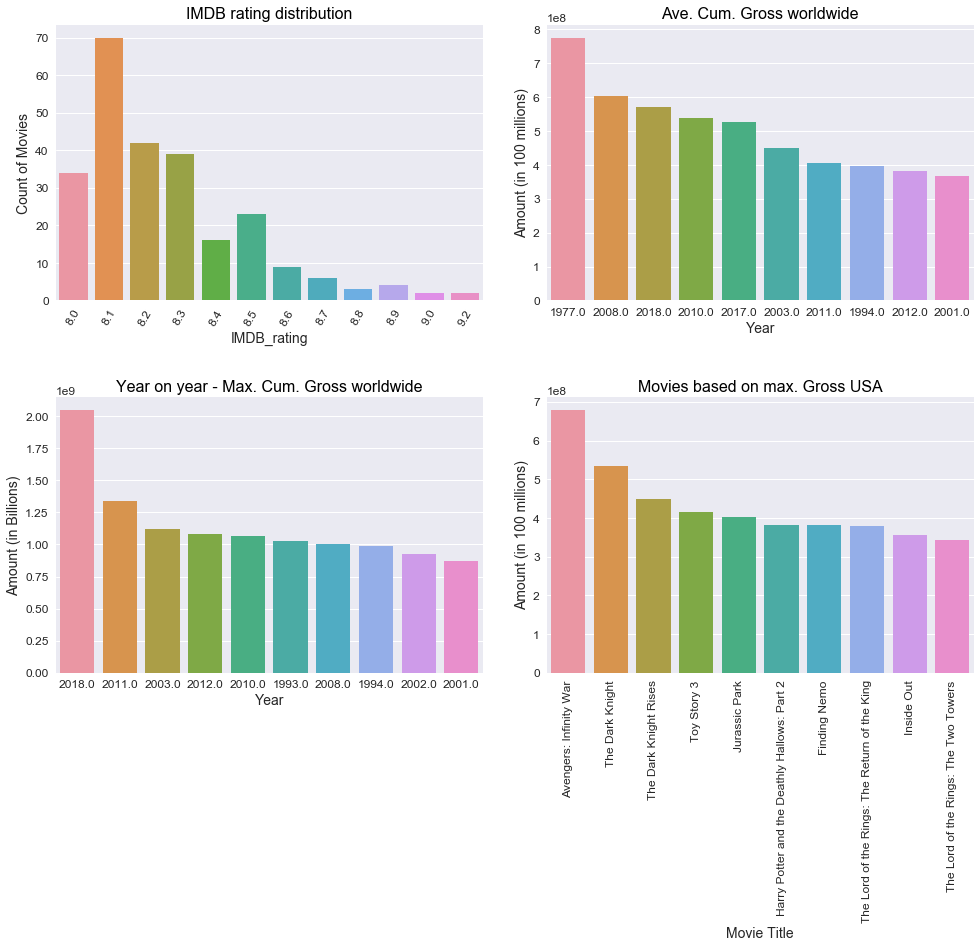

In [13]:
# IMDB distribution bar plot
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ordr1=dataset.groupby(["IMDB_rating"]).count().index
sns.countplot(data=dataset, x='IMDB_rating', label=True, order=ordr1)
plt.title('IMDB rating distribution')
plt.ylabel('Count of Movies')
plt.xticks(rotation=60)

# Average cumulative gross worldwide bar plot
plt.subplot(2,2,2)
mean_gross = dataset.groupby(['Year_released'])[['Cum_Gross_Worldwide_val']].mean().astype(int)
a1=mean_gross.sort_values(by='Cum_Gross_Worldwide_val',ascending=False)
a1=a1.iloc[0:10].reset_index()
ax= sns.barplot(a1.Year_released, a1.Cum_Gross_Worldwide_val, order=a1.Year_released)
plt.title('Ave. Cum. Gross worldwide')
plt.ylabel('Amount (in 100 millions)')
plt.xlabel('Year')

# Maximum cumulative gross worldwide bar plot
plt.subplot(2,2,3)
max_gross = dataset.groupby(['Year_released'])[['Cum_Gross_Worldwide_val']].max().astype(int)
b1=max_gross.sort_values(by='Cum_Gross_Worldwide_val',ascending=False)
b1=b1.iloc[0:10].reset_index()
ax= sns.barplot(b1.Year_released, b1.Cum_Gross_Worldwide_val, order=b1.Year_released)
plt.ylabel('Amount (in Billions)')
plt.xlabel('Year')
plt.title('Year on year - Max. Cum. Gross worldwide')

# Maximum gross-usa bar plot by movies
plt.subplot(2,2,4)
max_gross2 = dataset.groupby(['Title'])[['Gross_USA_val']].max().astype(int)
d1=max_gross2.sort_values(by='Gross_USA_val',ascending=False)
d1=d1.iloc[0:10].reset_index()
ax= sns.barplot(d1.Title, d1.Gross_USA_val, order=d1.Title)
plt.title('Movies based on max. Gross USA')
plt.ylabel('Amount (in 100 millions)')
plt.xlabel('Movie Title')
plt.xticks(rotation=90)

plt.subplots_adjust(top=0.9, bottom=0, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.15)

plt.show()

__Observation__:<br>

- IMDB rating are in the range of 8.1, 8.2 and 8.3 for most of the movies
- There are few movies above the rating of 8.8
- Suprisingly year 1977 has seen _maximum average cumulative gross_ collection worldwide, followed by 2008 and 2010. This may be because of surge of viewers during 1977 and good movies made that year. However, the maximum cumulative gross has been in 21st century in 2011, 2003 and 2010.
- Hollywood and 'western' movies seems to top the list in _maximum gross_ collection in USA for obvious reasons

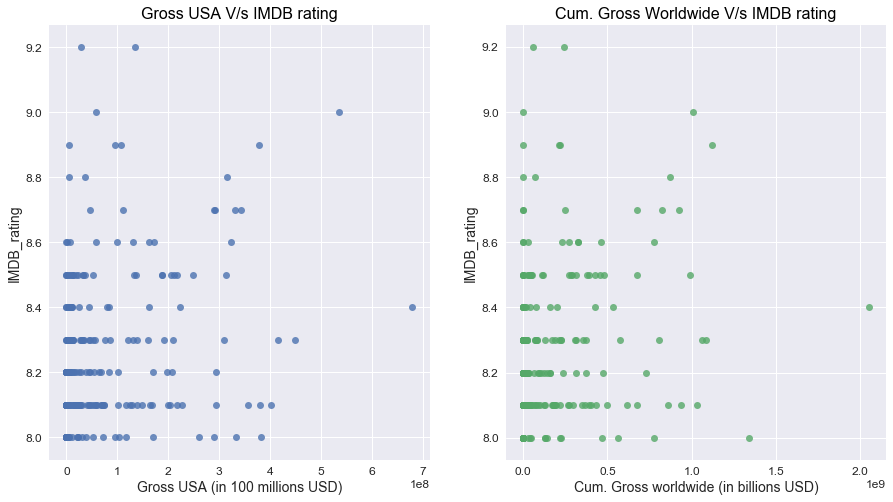

In [14]:
f, axes = plt.subplots (1,2, figsize=(15,8))
vis1 = sns.regplot(data=dataset, x='Gross_USA_val', y='IMDB_rating',fit_reg=False, ax=axes[0])
vis1.set(title="Gross USA V/s IMDB rating", xlabel= 'Gross USA (in 100 millions USD)')

vis2 = sns.regplot(data=dataset, x='Cum_Gross_Worldwide_val', y='IMDB_rating',fit_reg=False, ax=axes[1])
vis2.set(title="Cum. Gross Worldwide V/s IMDB rating", xlabel= 'Cum. Gross worldwide (in billions USD)')

plt.show()

__Observation__:<br>

- IMDB ratings are _not related_ to the gross USA collection  or cumulative worldwide collection

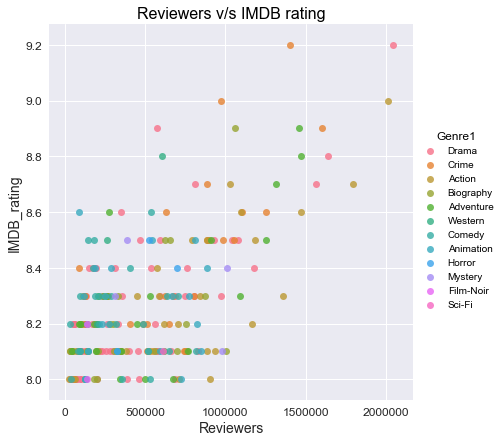

In [15]:
vis3 = sns.lmplot(data=dataset, x='Reviewers', y='IMDB_rating',fit_reg=False, hue='Genre1', size=6, aspect=1)
plt.title("Reviewers v/s IMDB rating")
plt.show()

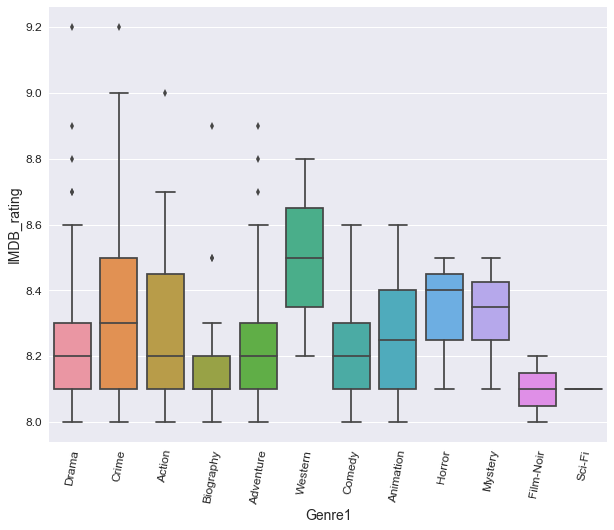

In [16]:
plt.figure(figsize=(10,8))
#plt.subplot(2,2,1)
bl = sns.boxplot(data=dataset, x= 'Genre1', y='IMDB_rating')
plt.xticks(rotation=80)
plt.show()

__Observation__:<br>
- It can be clearly observed that more the number of reviewers, higher is the IMDB rating
- Crime, Drama and Action are the top 3 genere, which reviewers have commented on

----

### 3. Data pre-processing

In [17]:
dataset.columns

Index(['Title', 'Link', 'Year_released', 'IMDB_rating', 'Reviewers',
       'Movie_rating', 'Movie_duration', 'Genre1', 'Genre2', 'Genre3',
       'Genre4', 'Release_date', 'Summary', 'Director', 'Writer1', 'Writer2',
       'Writer3', 'Stars1', 'Stars2', 'Stars3', 'Stars4', 'Stars5',
       'PlotKeywords', 'Budget_curr', 'Budget_val', 'Gross_USA_curr',
       'Gross_USA_val', 'Cum_Gross_Worldwide_curr', 'Cum_Gross_Worldwide_val',
       'Production_Company'],
      dtype='object')

In [18]:
# list of categorical columns
cat_cols = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']

# Droping unwanted column names from the list
cat_cols = [x for x in cat_cols if x not in ['Name of the movie','Link','Summary','PlotKeywords','Production_Company',\
                                             'Budget_curr','Gross_USA_curr','Cum_Gross_Worldwide_curr' ]]

In [19]:
dataset[cat_cols].head(20)

,Title,Movie_rating,Movie_duration,Genre1,Genre2,Genre3,Genre4,Release_date,Director,Writer1,Writer2,Writer3,Stars1,Stars2,Stars3,Stars4,Stars5
0,The Shawshank Redemption,A,2h 22min,Drama,,,,14 October 1994 (USA),Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",Frank Darabont (screenplay),,Tim Robbins,Morgan Freeman,Bob Gunton,,
1,The Godfather,A,2h 55min,Crime,Drama,,,24 March 1972 (USA),Francis Ford Coppola,Mario Puzo (screenplay by),Francis Ford Coppola (screenplay by),,Marlon Brando,Al Pacino,James Caan,,
2,The Godfather: Part II,Not_Available,3h 22min,Crime,Drama,,,20 December 1974 (USA),Francis Ford Coppola,Francis Ford Coppola (screenplay by),Mario Puzo (screenplay by),,Al Pacino,Robert De Niro,Robert Duvall,,
3,The Dark Knight,UA,2h 32min,Action,Crime,Drama,Thriller,18 July 2008 (India),Christopher Nolan,Jonathan Nolan (screenplay),Christopher Nolan (screenplay),,Christian Bale,Heath Ledger,Aaron Eckhart,,
4,12 Angry Men,Not_Available,1h 36min,Drama,,,,10 April 1957 (USA),Sidney Lumet,Reginald Rose (story),Reginald Rose (screenplay),,Henry Fonda,Lee J. Cobb,Martin Balsam,,
5,Schindler's List,A,3h 15min,Biography,Drama,History,,4 February 1994 (USA),Steven Spielberg,Thomas Keneally (book),Steven Zaillian (screenplay),,Liam Neeson,Ralph Fiennes,Ben Kingsley,,
6,The Lord of the Rings: The Return of the King,PG-13,3h 21min,Adventure,Drama,Fantasy,,6 February 2004 (India),Peter Jackson,J.R.R. Tolkien (novel),Fran Walsh (screenplay),,Elijah Wood,Viggo Mortensen,Ian McKellen,,
7,Pulp Fiction,A,2h 34min,Crime,Drama,,,14 October 1994 (USA),Quentin Tarantino,Quentin Tarantino (stories),Roger Avary (stories),,John Travolta,Uma Thurman,Samuel L. Jackson,,
8,"Il buono, il brutto, il cattivo",Not_Available,2h 41min,Western,,,,23 December 1966 (Italy),Sergio Leone,Luciano Vincenzoni (story),Sergio Leone (story),,Clint Eastwood,Eli Wallach,Lee Van Cleef,,
9,Fight Club,A,2h 19min,Drama,,,,15 October 1999 (USA),David Fincher,Chuck Palahniuk (novel),Jim Uhls (screenplay),,Brad Pitt,Edward Norton,Meat Loaf,,


In [20]:
# Making a copy of the dataframe before encoding categorical varaibles
dataset_orig = dataset.copy()

__Dropping unwanted columns__:<br>
- Based on the review of unique values of columns, the following 'categorical' varaibles can be dropped of, which will not add value to the model
- Additionally, dropping of 'unformatted' columns like Budget, Gross_USA and Cum_Gross_Worldwide, as we already have added the numeric format of these columns.

In [21]:
# List of columns to be dropped from the dataframe
drp = ['Link','Summary','PlotKeywords','Production_Company']
# dropping above column from the dataframe
dataset= dataset.drop(drp, axis=1)

 __Encoding categorical variables__

In [22]:
# Import required package
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()
# Encoding categorical columns 
for i in cat_cols:
    dataset[i]= encode_x.fit_transform(dataset[i])

In [23]:
dataset.head(10)

,Title,Year_released,IMDB_rating,Reviewers,Movie_rating,Movie_duration,Genre1,Genre2,Genre3,Genre4,...,Stars2,Stars3,Stars4,Stars5,Budget_curr,Budget_val,Gross_USA_curr,Gross_USA_val,Cum_Gross_Worldwide_curr,Cum_Gross_Worldwide_val
0,220,1994.0,9.2,2045328.0,1,51,6,0,0,0,...,156,24,0,0,USD,25000000.0,USD,28341469.0,USD,5.850000e+07
1,199,1972.0,9.2,1402791.0,1,80,5,6,0,0,...,2,97,0,0,USD,6000000.0,USD,134966411.0,USD,2.450664e+08
2,200,1974.0,9.0,972533.0,3,92,5,6,0,0,...,179,188,0,0,USD,13000000.0,USD,57300000.0,NaN,0.000000e+00
3,193,2008.0,9.0,2012714.0,8,62,0,5,4,12,...,79,0,0,0,USD,185000000.0,USD,534858444.0,USD,1.004558e+09
4,0,1957.0,8.9,576027.0,3,12,6,0,0,0,...,126,145,0,0,USD,350000.0,USD,4360000.0,NaN,0.000000e+00
5,166,1993.0,8.9,1058362.0,1,90,3,6,8,0,...,174,19,0,0,USD,22000000.0,USD,96067179.0,USD,2.210000e+08
6,213,2003.0,8.9,1456606.0,5,91,1,6,6,0,...,218,89,0,0,USD,94000000.0,USD,377845905.0,USD,1.119930e+09
7,148,1994.0,8.9,1598144.0,1,64,5,6,0,0,...,217,198,0,0,USD,8000000.0,USD,107928762.0,USD,2.139288e+08
8,84,1966.0,8.8,607098.0,3,71,11,0,0,0,...,48,132,0,0,USD,1200000.0,USD,6100000.0,NaN,0.000000e+00
9,59,1999.0,8.8,1637140.0,1,47,6,0,0,0,...,46,152,0,0,USD,63000000.0,USD,37030102.0,USD,7.100000e+07


In [24]:
# Getting correlation of varaibles to IMDB rating
dataset[dataset.columns[0:]].corr()['IMDB_rating'].sort_values(ascending=False)

IMDB_rating                1.000000
Reviewers                  0.630379
Gross_USA_val              0.243425
Cum_Gross_Worldwide_val    0.227400
Title                      0.140882
Movie_duration             0.121539
Writer2                    0.042609
Stars1                     0.037745
Genre1                     0.019247
Year_released              0.012857
Writer1                    0.005305
Genre4                    -0.012804
Stars2                    -0.024694
Director                  -0.031501
Genre3                    -0.040560
Budget_val                -0.046781
Release_date              -0.057237
Movie_rating              -0.076608
Stars3                    -0.103971
Genre2                    -0.109854
Writer3                         NaN
Stars4                          NaN
Stars5                          NaN
Name: IMDB_rating, dtype: float64

__Spltting the database__:
- Splitting the dataframe into train(80%) and test(20%). The target and the predictors can be defined as seperate lists and model building can be carried out accordingly.
- (Optional) The predictors and the target variables can beseperated into X and y and then thse two dataframes can be split (80-20), but it depends on individuals preference

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset, test_size = 0.2, random_state = 0)

In [26]:
train.shape, test.shape

((200, 26), (50, 26))

### 5.0 Machine Learning - Model Buidling

#### UDF - User defined function 
A user defined function which will carry out the following taks;
- Fit the model to the dataset
- Predict values from the trained model
- Generate report on __RMSE and MAPE__

In [32]:
# Importing function to test the model and provide results
from support.algFit import algorthm_test
import sys, importlib
importlib.reload(sys.modules['support.algFit'])

<module 'support.algFit' from 'C:\\Users\\Nags\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Nagesh Python Notebooks\\IMDB Web scraping\\support\\algFit.py'>

__Assigning targets and predictors__

In [28]:
# Create different list of different predictors / varaibles for model building
top_corr= ['Reviewers','Gross_USA_val','Cum_Gross_Worldwide_val','Movie_duration','Stars1','Genre1','Year_released','Writer1']
top_three = ['Reviewers','Gross_USA_val','Cum_Gross_Worldwide_val']
predictors = ['Year_released', 'Reviewers', 'Movie_rating', 'Movie_duration','Genre1', 'Genre2', 'Genre3', 
              'Genre4', 'Release_date', 'Director','Writer1', 'Writer2', 'Stars1', 'Stars2',
              'Stars3', 'Stars4', 'Stars5', 'Budget_val','Gross_USA_val', 'Cum_Gross_Worldwide_val']

target = 'IMDB_rating'

#### 5.1 Linear Regression Model

In [29]:
# Building a linear regression model 
np.random.seed(123)
from sklearn.linear_model import LinearRegression
lin_alg = LinearRegression(normalize=True)

In [33]:
# checking results with all the predictors
algorthm_test(lin_alg, train, test, predictors, target)


------Model Report----
RMSE : 15.806%
MAPE Error: 1.566%
CV Score Mean : 0.2041
CV Score Std : 0.1415

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.3 8.2 8.2 8.4 8.2 8.3 8.2 8. ]


In [34]:
# checking results with top correlating variables
algorthm_test(lin_alg, train, test, top_corr, target)


------Model Report----
RMSE : 16.339%
MAPE Error: 1.538%
CV Score Mean : 0.1677
CV Score Std : 0.04378

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.3 8.2 8.2 8.4 8.2 8.2 8.1 8.1]


In [35]:
# checking results with top_three correlating variables
algorthm_test(lin_alg, train, test, top_three, target)


------Model Report----
RMSE : 17.359%
MAPE Error: 1.730%
CV Score Mean : 0.1759
CV Score Std : 0.03742

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.4 8.3 8.2 8.4 8.1 8.1 8.2 8.1]


#### 5.2 Ridge Regression Model:

In [36]:
### Ridge Regression Model:
np.random.seed(123)
from sklearn.linear_model import Ridge
rdg_alg = Ridge(alpha=0.05,normalize=True)

In [37]:
# checking results with all the predictors
algorthm_test(rdg_alg, train, test, predictors, target)


------Model Report----
RMSE : 15.982%
MAPE Error: 1.542%
CV Score Mean : 0.2063
CV Score Std : 0.1465

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.3 8.2 8.2 8.3 8.2 8.3 8.2 8.1]


In [38]:
# checking results with top correlating variables
algorthm_test(rdg_alg, train, test, top_corr, target)


------Model Report----
RMSE : 16.499%
MAPE Error: 1.466%
CV Score Mean : 0.1689
CV Score Std : 0.04071

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.3 8.2 8.2 8.4 8.2 8.2 8.1 8.1]


#### 5.3 Decision Tree Model

In [39]:
# Building a Decision Tree regression model 
np.random.seed(123)
from sklearn.tree import DecisionTreeRegressor
dec_alg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [40]:
# checking results with all the predictors
algorthm_test(dec_alg, train, test, predictors, target)


------Model Report----
RMSE : 12.200%
MAPE Error: 1.738%
CV Score Mean : 0.2148
CV Score Std : 0.05216

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.2 8.2 8.4 8.2 8.1 8.2 8.1 8.1]


In [41]:
# checking results with top correlating variables
algorthm_test(dec_alg, train, test, top_corr, target)


------Model Report----
RMSE : 12.110%
MAPE Error: 1.664%
CV Score Mean : 0.1934
CV Score Std : 0.03897

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.2 8.1 8.3 8.2 8.2 8.2 8.2 8.1]


#### 5.4 Random Forest Model

In [42]:
### Random Forest Model
np.random.seed(123)
from sklearn.ensemble import RandomForestRegressor
rand_alg = RandomForestRegressor(n_estimators=5,max_depth=5, min_samples_leaf=3,n_jobs=1)

In [43]:
# checking results with all the predictors
algorthm_test(rand_alg, train, test, predictors, target)


------Model Report----
RMSE : 12.541%
MAPE Error: 1.451%
CV Score Mean : 0.1722
CV Score Std : 0.03538

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.2 8.1 8.2 8.2 8.2 8.5 8.3 8.2]


In [44]:
# checking results with top correlating variables
algorthm_test(rand_alg, train, test, top_corr, target)


------Model Report----
RMSE : 12.140%
MAPE Error: 1.472%
CV Score Mean : 0.1693
CV Score Std : 0.03438

----------Sample values---
y_true values [8.  8.2 8.3 8.1 8.1 8.1 8.1 8.3]
y_pred values [8.2 8.2 8.3 8.2 8.2 8.3 8.2 8.1]


----

### Conclusion

- Based on the RMSE and MAPE results, it can be observed that __Decision tree / Random forest models__ results in low MAPE error
- _Improvements_:
    - Variable (predictors) selection for model building should be improved by further analysis. Predictors cannot be choosed just from the correlation with target - IMDB_rating.
    - Decision tree and Random Forest Models can be further improved by using 'GridSearch' and 'XGBoost' 